In [22]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
plt.style.use('dark_background')

# Error Analysis

In [23]:
error_file = 'bert_results_03.05_23.00_final_old_classes'

In [24]:
summary = pd.read_excel(f'../logs/{error_file}.xlsx', sheet_name='summary', index_col=0)
summary

,03.06_18.38
TRAIN_SPLIT_PROP,0.7
PRETRAINED_LM,bert-base-uncased
LOGGING,True
MAX_LENGTH,64
BATCH_SIZE,32
NUM_EPOCHS,50
LEARNING_RATE,0.00002
DROPOUT,0.3
BALANCE_FACTOR,0.1
PATIENCE,3


In [25]:
valid_class_report = pd.read_excel(f'../logs/{error_file}.xlsx', sheet_name='valid_class_report', index_col=0)
valid_class_report = valid_class_report.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
valid_class_report.support = valid_class_report.support.astype(int)

valid_class_report.sort_values(by='f1-score')

,precision,recall,f1-score,support
U.S. NEWS,0.381643,0.413613,0.396985,191
GOOD NEWS,0.357143,0.480769,0.409836,156
WOMEN,0.417910,0.420263,0.419083,533
IMPACT,0.457854,0.446729,0.452223,535
FIFTY,0.414286,0.511765,0.457895,170
WEIRD NEWS,0.411058,0.524540,0.460916,326
TASTE,0.412698,0.528455,0.463458,246
PARENTS,0.531197,0.450000,0.487239,700
CULTURE & ARTS,0.403727,0.650000,0.498084,100
LATINO VOICES,0.558824,0.467980,0.509383,203


In [26]:
valid_class_report.loc[valid_class_report['f1-score'] < 0.7].sort_values(by='f1-score')

,precision,recall,f1-score,support
U.S. NEWS,0.381643,0.413613,0.396985,191
GOOD NEWS,0.357143,0.480769,0.409836,156
WOMEN,0.417910,0.420263,0.419083,533
IMPACT,0.457854,0.446729,0.452223,535
FIFTY,0.414286,0.511765,0.457895,170
WEIRD NEWS,0.411058,0.524540,0.460916,326
TASTE,0.412698,0.528455,0.463458,246
PARENTS,0.531197,0.450000,0.487239,700
CULTURE & ARTS,0.403727,0.650000,0.498084,100
LATINO VOICES,0.558824,0.467980,0.509383,203


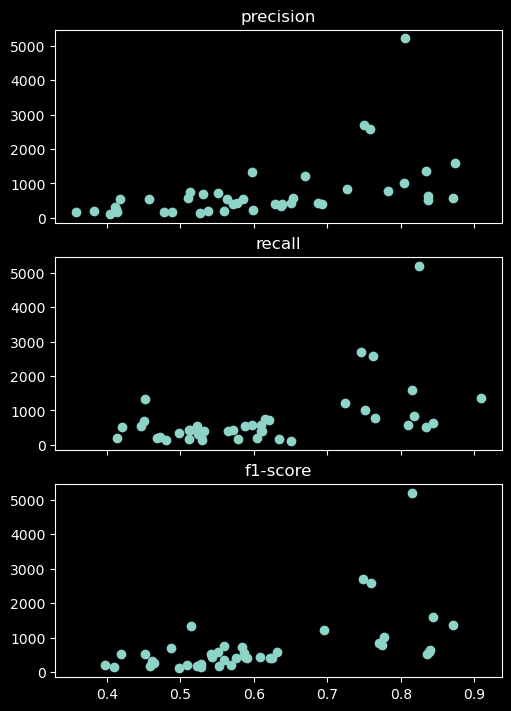

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(5,7), sharey=True, sharex=True, layout = 'constrained')

for ax, metric in zip(axes, ['precision', 'recall', 'f1-score']):
    ax.scatter(valid_class_report[metric], valid_class_report['support'])
    ax.set_title(metric)

plt.show()

# Clustering and Class Refinement

In [28]:
news_clusters = pd.read_csv('../data/processed/news_clustered_classes.csv', index_col=0)
news_clusters.cluster.value_counts(normalize=True)

cluster
1    0.172619
0    0.144296
2    0.123319
6    0.120847
4    0.088668
8    0.088600
5    0.076264
7    0.069506
9    0.066376
3    0.049505
Name: proportion, dtype: float64

In [29]:
print(
    f'Adjusted Rand Index: {metrics.adjusted_rand_score(news_clusters.category, news_clusters.cluster)}\n'
    f'Normalized Mutual Information: {metrics.normalized_mutual_info_score(news_clusters.category, news_clusters.cluster)}\n'
    f'Fowlkes Mallows: {metrics.fowlkes_mallows_score(news_clusters.category, news_clusters.cluster)}'
)

Adjusted Rand Index: 0.047380686445857204
Normalized Mutual Information: 0.10713339893485144
Fowlkes Mallows: 0.13816717495288694


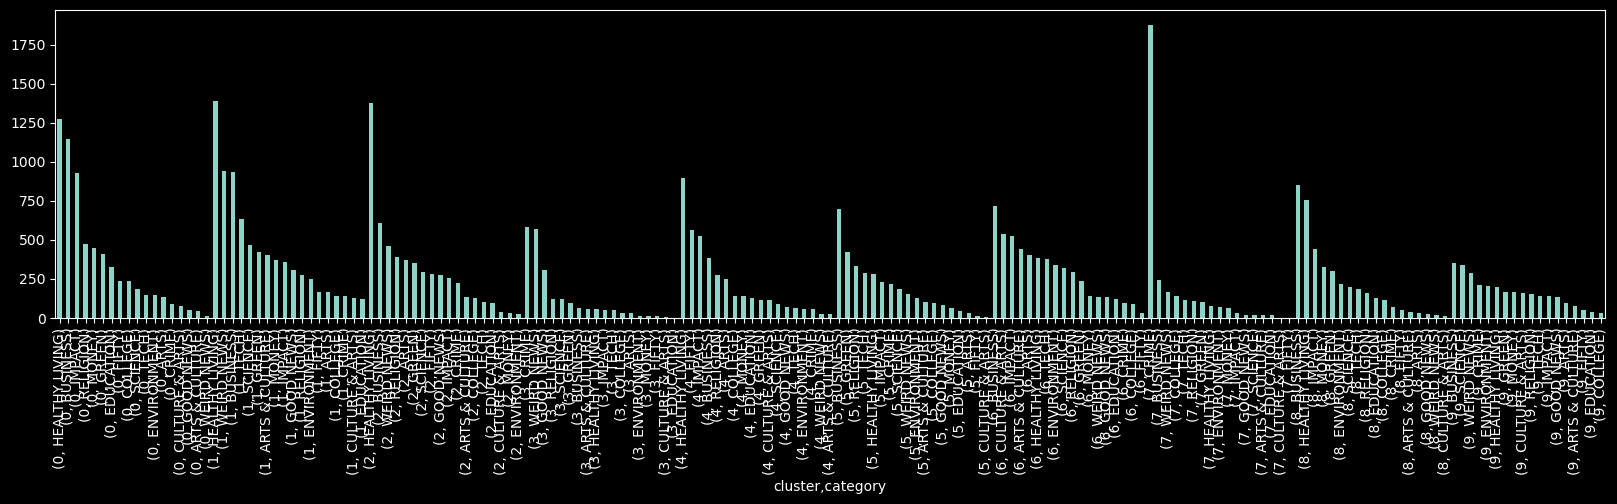

In [30]:
fig, ax = plt.subplots(figsize = (20, 4))
news_clusters.groupby('cluster').category.value_counts().plot(kind='bar')
plt.show()

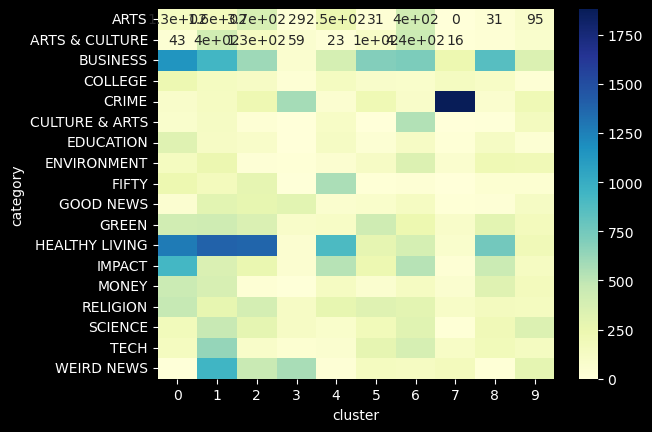

In [31]:
cross_tab = pd.crosstab(news_clusters.category, news_clusters.cluster)
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.show()

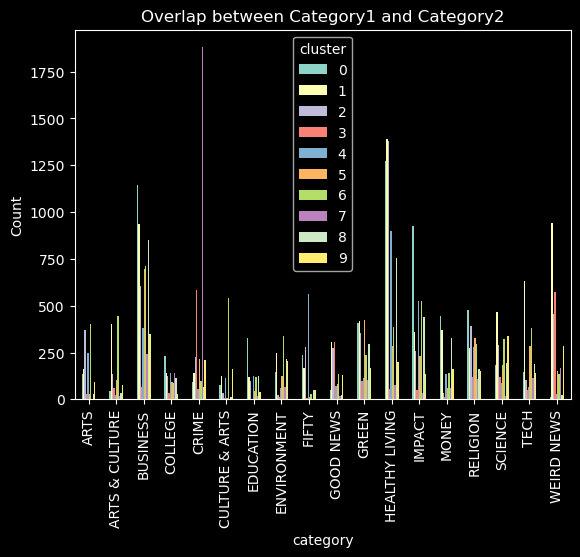

In [32]:
cross_tab.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.title('Overlap between Category1 and Category2')
plt.show()

# Tuning Results

## Data preprocessing parameters

In [33]:
log_file = '03.09_input_params'
results = pd.read_csv(f'../logs/tuning_results_{log_file}.csv', index_col=0).transpose()
results.transpose()

,03.08_18.26,03.08_18.57,03.08_19.26,03.08_19.55,03.08_20.35,03.08_21.10,03.08_21.37,03.08_22.10,03.08_22.43,03.08_23.24,03.08_23.53,03.09_00.24,03.09_00.57,03.09_01.30,03.09_02.15,03.09_02.44,03.09_03.16,03.09_03.47
CONSOLIDATE_LABELS,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
CONSOLIDATE_OTHER,True,True,True,True,True,False,False,False,False,False,True,True,True,True,True,False,False,False
DATA_AUGMENTATION,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN
TRAIN_SPLIT_PROP,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
PRETRAINED_LM,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased
LOGGING,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MAX_LENGTH,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64,64
BATCH_SIZE,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
NUM_EPOCHS,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
LEARNING_RATE,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05


In [34]:
results.sort_values('valid_accuracy', ascending=False).head(5).transpose()

,03.08_19.55,03.08_18.57,03.08_19.26,03.08_18.26,03.08_20.35
CONSOLIDATE_LABELS,True,True,True,True,True
CONSOLIDATE_OTHER,True,True,True,True,True
DATA_AUGMENTATION,NaN,NaN,NaN,False,NaN
TRAIN_SPLIT_PROP,0.7,0.7,0.7,0.7,0.7
PRETRAINED_LM,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased
LOGGING,False,False,False,False,False
MAX_LENGTH,64,64,64,64,64
BATCH_SIZE,32,32,32,32,32
NUM_EPOCHS,50,50,50,50,50
LEARNING_RATE,2e-05,2e-05,2e-05,2e-05,2e-05


In [35]:
result_cols = [
    'train_accuracy', 'valid_accuracy', 'test_accuracy', 'train_precision', 'valid_precision', 'test_precision', 
    'train_recall', 'valid_recall', 'test_recall', 'train_f1', 'valid_f1', 'test_f1'
]
hyperparam_cols = ['TRAIN_SPLIT_PROP', 'LEARNING_RATE', 'DROPOUT', 'BALANCE_FACTOR']

plot_df = results.filter(hyperparam_cols + result_cols).set_index(hyperparam_cols)

max_train_acc = plot_df.train_accuracy.astype('float').max()
max_valid_acc = plot_df.valid_accuracy.astype('float').max()
max_test_acc = plot_df.test_accuracy.astype('float').max()

max_train_prec = plot_df.train_precision.astype('float').max()
max_valid_prec = plot_df.valid_precision.astype('float').max()
max_test_prec = plot_df.test_precision.astype('float').max()

max_train_rec = plot_df.train_recall.astype('float').max()
max_valid_rec = plot_df.valid_recall.astype('float').max()
max_test_rec = plot_df.test_recall.astype('float').max()

max_train_f1 = plot_df.train_f1.astype('float').max()
max_valid_f1 = plot_df.valid_f1.astype('float').max()
max_test_f1 = plot_df.test_f1.astype('float').max()

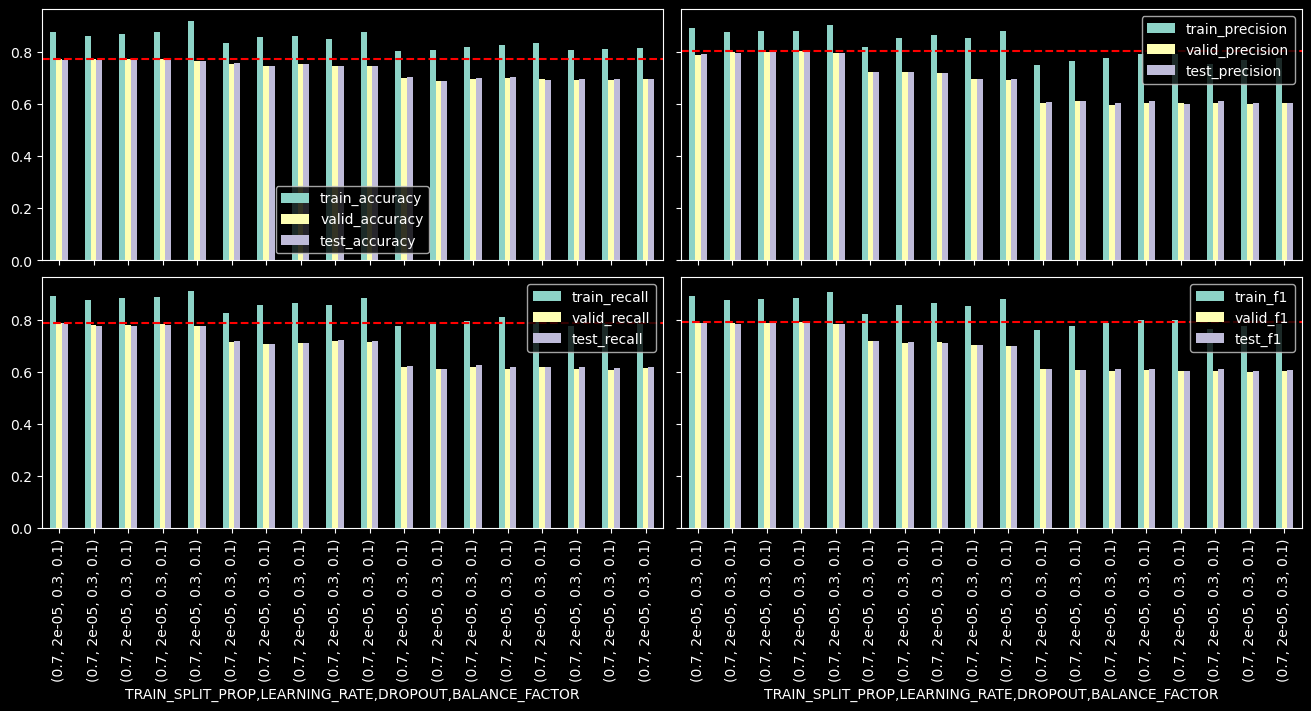

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(13,7), sharey=True, sharex=True, layout = 'constrained')

for ax, metric, max in zip(axes.ravel(), ['accuracy', 'precision', 'recall', 'f1'], [max_test_acc, max_test_prec, max_test_rec, max_test_f1]): 
    plot_df.filter(like=metric, axis=1).astype('float').plot(kind='bar', ax=ax)
    ax.axhline(y=max, color='r', linestyle='--')

plt.show()

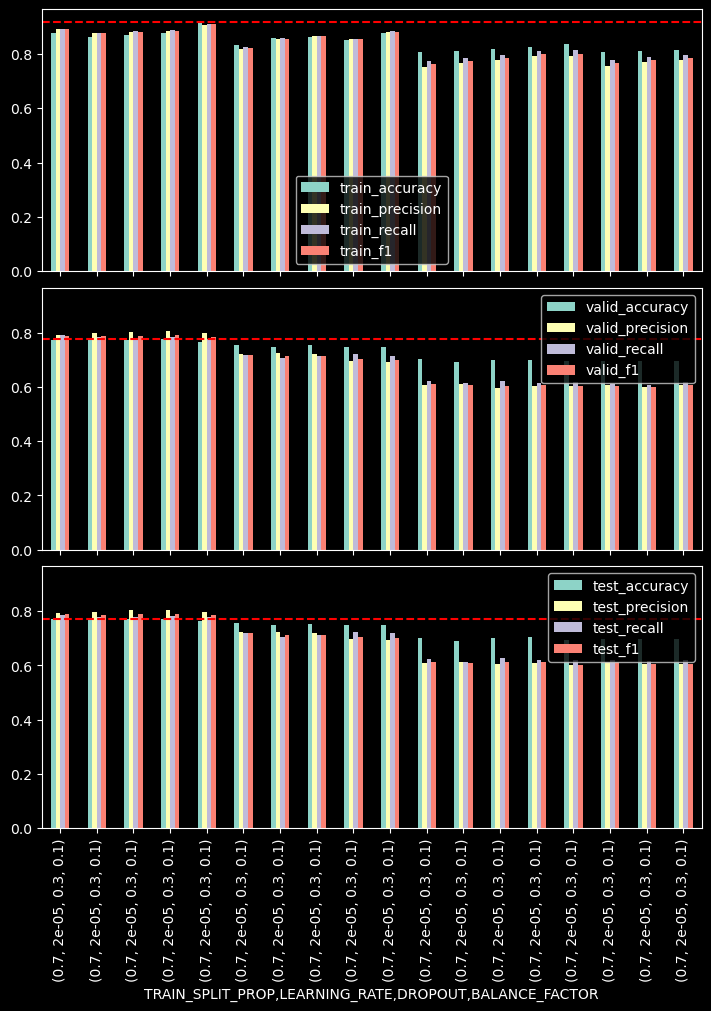

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(7,10), sharey=True, sharex=True, layout = 'constrained')

for ax, subset, max in zip(axes, ['train', 'valid', 'test'], [max_train_acc, max_valid_acc, max_test_acc]): 
    plot_df.filter(like=subset, axis=1).astype('float').plot(kind='bar', ax=ax)
    ax.axhline(y=max, color='r', linestyle='--')

plt.show()

## Model Hyperparameters

In [38]:
log_file = '03.09_hyperparams'
results = pd.read_csv(f'../logs/tuning_results_{log_file}.csv', index_col=0).transpose()
results.transpose()

,03.09_15.43,03.09_16.00,03.09_16.18,03.09_16.39,03.09_17.05,03.09_17.26,03.09_17.48,03.09_18.31,03.09_19.13,03.09_19.39,...,03.09_22.34,03.09_23.10,03.09_23.26,03.09_23.41,03.09_23.57,03.10_00.22,03.10_00.50,03.10_01.18,03.10_01.50,03.10_03.21
CONSOLIDATE_LABELS,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
CONSOLIDATE_OTHER,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
DATA_AUGMENTATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAIN_SPLIT_PROP,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
PRETRAINED_LM,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,...,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased
LOGGING,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MAX_LENGTH,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
BATCH_SIZE,32,32,32,32,32,32,32,32,32,64,...,64,128,128,128,128,128,128,128,128,128
NUM_EPOCHS,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
LEARNING_RATE,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,...,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05


In [39]:
results.sort_values('valid_accuracy', ascending=False).head(5).transpose()

,03.09_23.57,03.09_16.39,03.09_20.23,03.09_17.05,03.10_00.22
CONSOLIDATE_LABELS,True,True,True,True,True
CONSOLIDATE_OTHER,True,True,True,True,True
DATA_AUGMENTATION,NaN,NaN,NaN,NaN,NaN
TRAIN_SPLIT_PROP,0.7,0.7,0.7,0.7,0.7
PRETRAINED_LM,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased
LOGGING,False,False,False,False,False
MAX_LENGTH,64,64,64,64,64
BATCH_SIZE,128,32,64,32,128
NUM_EPOCHS,10,10,10,10,10
LEARNING_RATE,2e-05,2e-05,2e-05,2e-05,2e-05


In [40]:
result_cols = [
    'train_accuracy', 'valid_accuracy', 'test_accuracy', 'train_precision', 'valid_precision', 'test_precision', 
    'train_recall', 'valid_recall', 'test_recall', 'train_f1', 'valid_f1', 'test_f1'
]
hyperparam_cols = ['TRAIN_SPLIT_PROP', 'LEARNING_RATE', 'DROPOUT', 'BALANCE_FACTOR']

plot_df = results.filter(hyperparam_cols + result_cols).set_index(hyperparam_cols)

max_train_acc = plot_df.train_accuracy.astype('float').max()
max_valid_acc = plot_df.valid_accuracy.astype('float').max()
max_test_acc = plot_df.test_accuracy.astype('float').max()

max_train_prec = plot_df.train_precision.astype('float').max()
max_valid_prec = plot_df.valid_precision.astype('float').max()
max_test_prec = plot_df.test_precision.astype('float').max()

max_train_rec = plot_df.train_recall.astype('float').max()
max_valid_rec = plot_df.valid_recall.astype('float').max()
max_test_rec = plot_df.test_recall.astype('float').max()

max_train_f1 = plot_df.train_f1.astype('float').max()
max_valid_f1 = plot_df.valid_f1.astype('float').max()
max_test_f1 = plot_df.test_f1.astype('float').max()

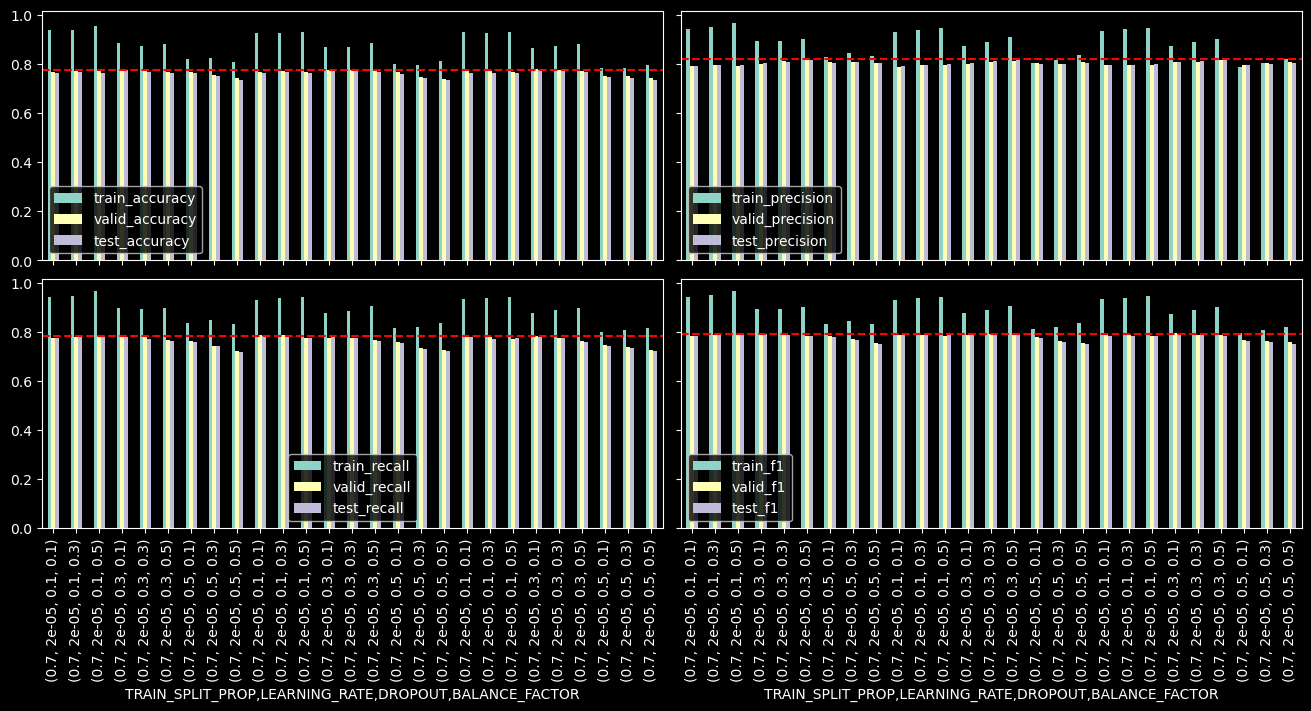

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(13,7), sharey=True, sharex=True, layout = 'constrained')

for ax, metric, max in zip(axes.ravel(), ['accuracy', 'precision', 'recall', 'f1'], [max_test_acc, max_test_prec, max_test_rec, max_test_f1]): 
    plot_df.filter(like=metric, axis=1).astype('float').plot(kind='bar', ax=ax)
    ax.axhline(y=max, color='r', linestyle='--')

plt.show()

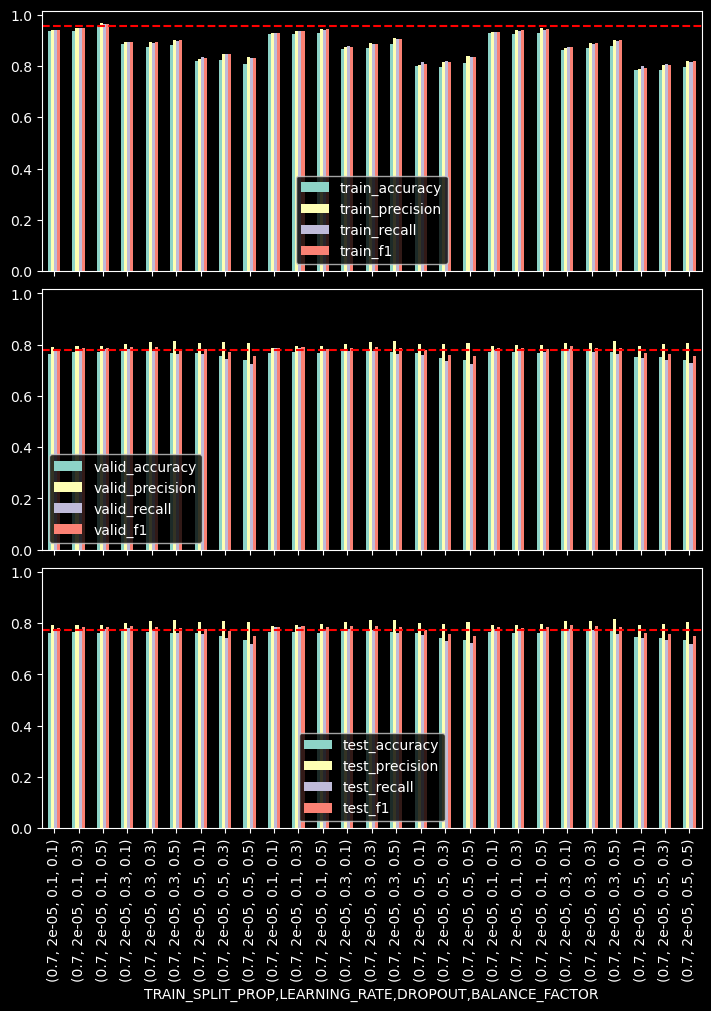

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(7,10), sharey=True, sharex=True, layout = 'constrained')

for ax, subset, max in zip(axes, ['train', 'valid', 'test'], [max_train_acc, max_valid_acc, max_test_acc]): 
    plot_df.filter(like=subset, axis=1).astype('float').plot(kind='bar', ax=ax)
    ax.axhline(y=max, color='r', linestyle='--')

plt.show()

## Max Length

In [43]:
log_file = '03.10_max_length'
results = pd.read_csv(f'../logs/tuning_results_{log_file}.csv', index_col=0).transpose()
results.transpose()
results.sort_values('valid_accuracy', ascending=False).head(5).transpose()

,03.10_12.43,03.10_14.12,03.10_12.02,03.10_11.27
CONSOLIDATE_LABELS,True,True,True,True
CONSOLIDATE_OTHER,True,True,True,True
DATA_AUGMENTATION,NaN,NaN,NaN,NaN
TRAIN_SPLIT_PROP,0.7,0.7,0.7,0.7
PRETRAINED_LM,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased
LOGGING,False,False,False,False
MAX_LENGTH,128,256,64,32
BATCH_SIZE,32,32,32,32
NUM_EPOCHS,10,10,10,10
LEARNING_RATE,2e-05,2e-05,2e-05,2e-05


### Large versus Small BERT

In [45]:
log_file = '03.10_large_small_bert'
results = pd.read_csv(f'../logs/tuning_results_{log_file}.csv', index_col=0).transpose()
results.transpose()
results.sort_values('valid_accuracy', ascending=False).head(5).transpose()

,03.10_16.02,03.10_18.00
CONSOLIDATE_LABELS,True,True
CONSOLIDATE_OTHER,True,True
DATA_AUGMENTATION,NaN,NaN
TRAIN_SPLIT_PROP,0.7,0.7
PRETRAINED_LM,bert-large-uncased,bert-base-uncased
LOGGING,False,False
MAX_LENGTH,128,128
BATCH_SIZE,32,32
NUM_EPOCHS,10,10
LEARNING_RATE,2e-05,2e-05
